In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
pd.set_option('display.max_colwidth', 15)

In [2]:
df = pd.read_csv('../data/df_subvar.csv')

In [3]:
df = df.loc[(df['WhiteElo'] >= 2500) | (df['WhiteElo'].isna())]
df = df.loc[(df['BlackElo'] >= 2500) | (df['BlackElo'].isna())]

In [4]:
df = df.sort_values('SubVariation')
df

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays,SubVariation,Mainline
563,366954,Chartres op,Chartres,1990,Gerald,"Pascot, J.",0-1,NaN,C89,NaN,0,1,41,2,3,5,1,"[29, 57, 54...",444,-1009,-1009,10,2,6,7,4,5,1,15,6,5,6,3,4,1,6012,-17288,-11276,1. e4 e5 2....,9. Bc2 dxe4,"['e4', 'e5'..."
1560,1024350,Yanofsky Mem,Winnipeg,2004,"Pierre,Rolland","Prince,Colin",1-0,NaN,C89,NaN,1,0,39,9,6,15,0,"[20, 50, 47...",2651,-230,2075,10,2,5,5,3,2,1,15,1,4,6,5,4,3,29804,-293,29511,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
348,224874,Ramsgate,Ramsgate/Ma...,1984,"O'Brien, Ri...","Crawley, Gavin",0-1,NaN,C89,NaN,0,1,47,4,5,9,0,"[26, 53, 47...",155,-698,-698,21,7,4,5,2,0,1,26,10,5,3,2,0,0,3270,-3185,85,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
192,125789,Lugano ol (...,Lugano,1968,"Yanofsky, D...","Rovira Mas,...",1-0,NaN,C89,NaN,1,0,41,6,4,10,1,"[37, 53, 54...",299,-109,275,10,14,4,6,0,0,0,21,7,3,6,2,1,0,4204,-850,3354,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
602,392471,Novi Sad ol...,Novi Sad,1990,"Cardose, S.","Gambiza, N.",1-0,NaN,C89,NaN,1,0,54,1,0,1,1,"[46, 55, 52...",1508,-447,1286,13,4,7,7,4,0,2,18,6,14,8,3,3,1,45458,-582,44876,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,432619,Oberschwabe...,Jedesheim,1991,"Rector, D.","Rothmund, J.",0-1,NaN,C89,NaN,0,1,16,13,11,24,0,"[44, 42, 43...",177,-768,-762,7,2,2,0,1,2,0,11,2,0,1,1,0,0,1321,-3237,-1916,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
1707,1118881,IRT5,Sao Paulo,2006,"Jonas,Tiago...","Francelli,D...",1/2-1/2,NaN,C89,NaN,0,0,20,12,10,22,1,"[28, 40, 47...",156,-338,-29,6,5,2,2,0,1,0,7,5,3,2,2,0,0,1367,-3278,-1911,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
96,63572,Sao Paulo zt,Sao Paulo,1960,"Recalde, E.","Camara, Ronald",1/2-1/2,NaN,C89,NaN,0,0,20,11,10,21,0,"[32, 58, 42...",163,-142,143,8,3,3,2,1,0,0,9,4,3,0,3,0,0,2446,-142,2304,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
1129,747453,CRO-chT2,Tucepi,1996,"Jelic, J.","Sertic, Rudolf",0-1,NaN,C89,NaN,0,1,22,11,12,23,0,"[27, 44, 54...",59,-99995,-99995,10,2,1,0,3,3,1,13,5,0,2,1,0,0,691,-213600,-212909,1. e4 e5 2....,9. h3 dxe4,"['e4', 'e5'..."


In [5]:
df['SubVariation'].unique()

array(['9. Bc2 dxe4', '9. d3 Bb7', '9. d3 Bg4', '9. d3 Qd6', '9. d3 d4',
       '9. d3 dxe4', '9. d3 h6', '9. d4 Bg4', '9. d4 Nxe4', '9. d4 dxe4',
       '9. d4 exd4', '9. exd5 Nxd5', '9. exd5 e4', '9. h3 dxe4'],
      dtype=object)

C:\Users\edupo\AppData\Local\Temp\ipykernel_12324\2469112444.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


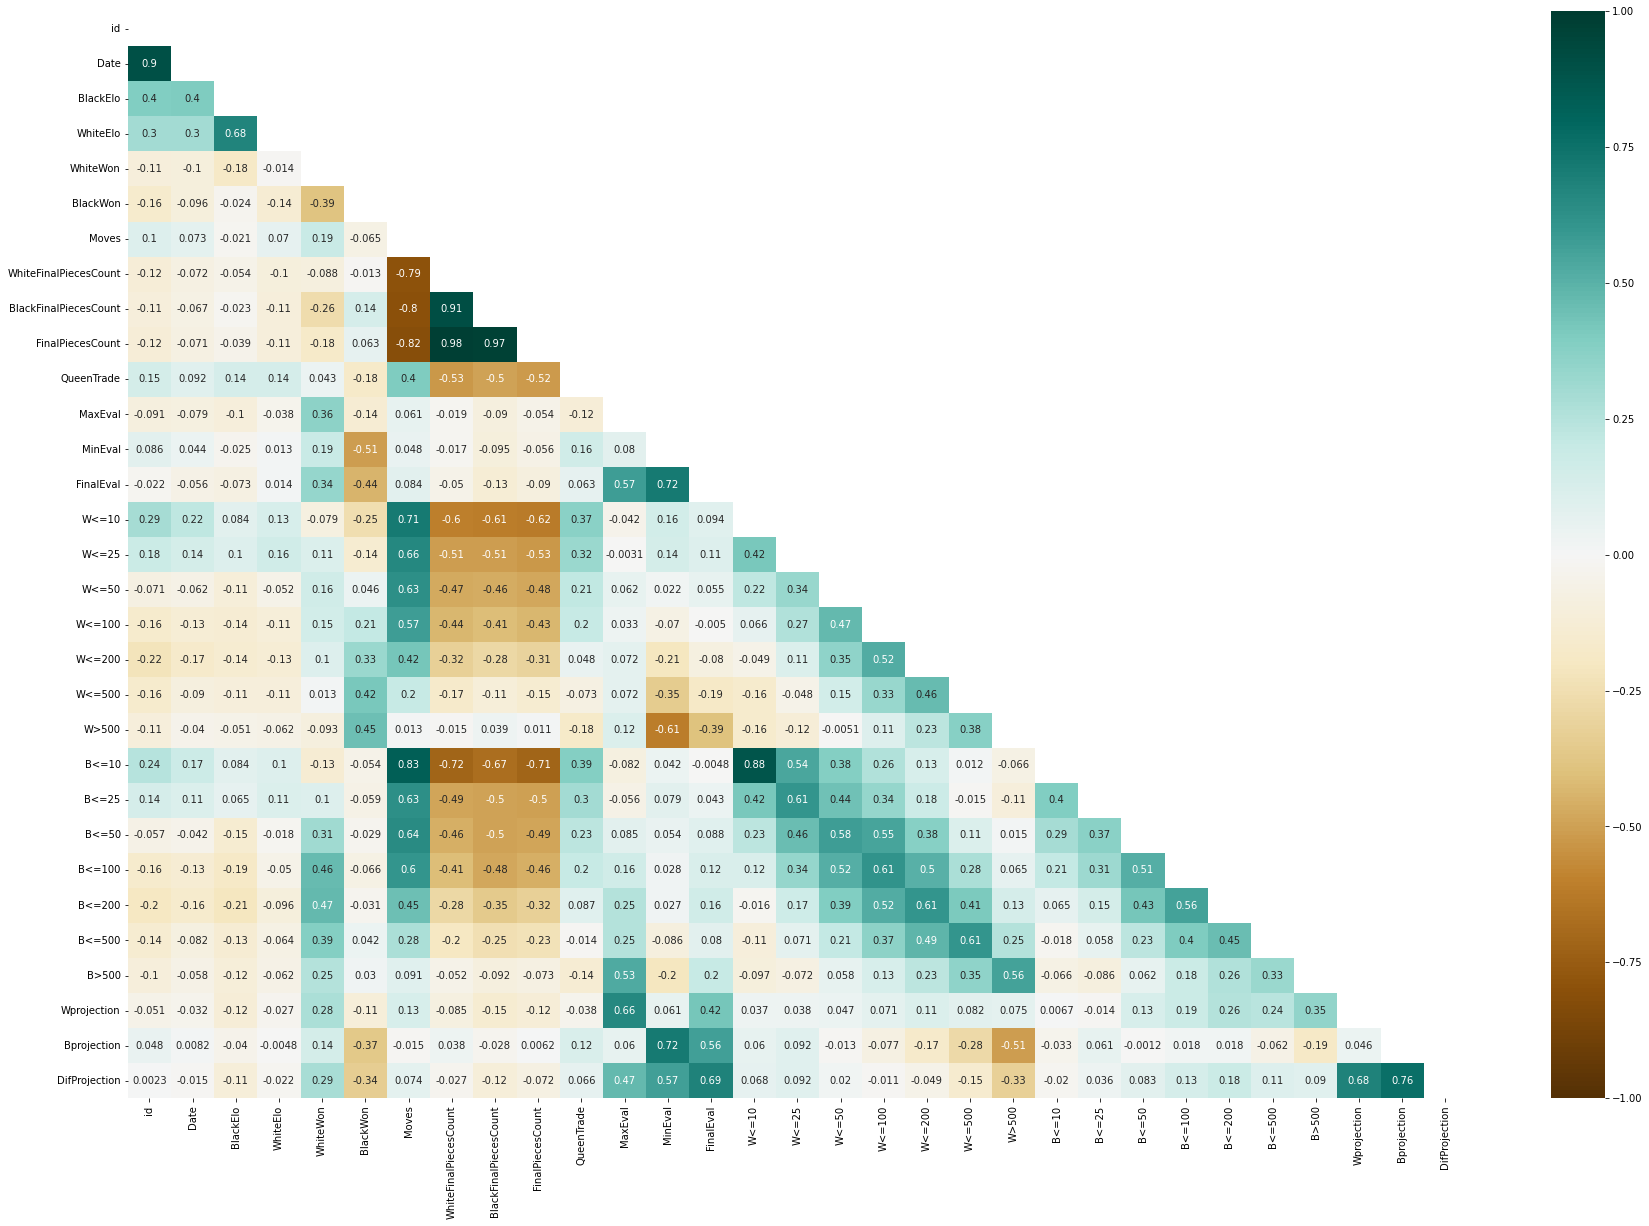

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('asd', fontdict={'fontsize':32}, pad=16);

<AxesSubplot:ylabel='DifProjection'>

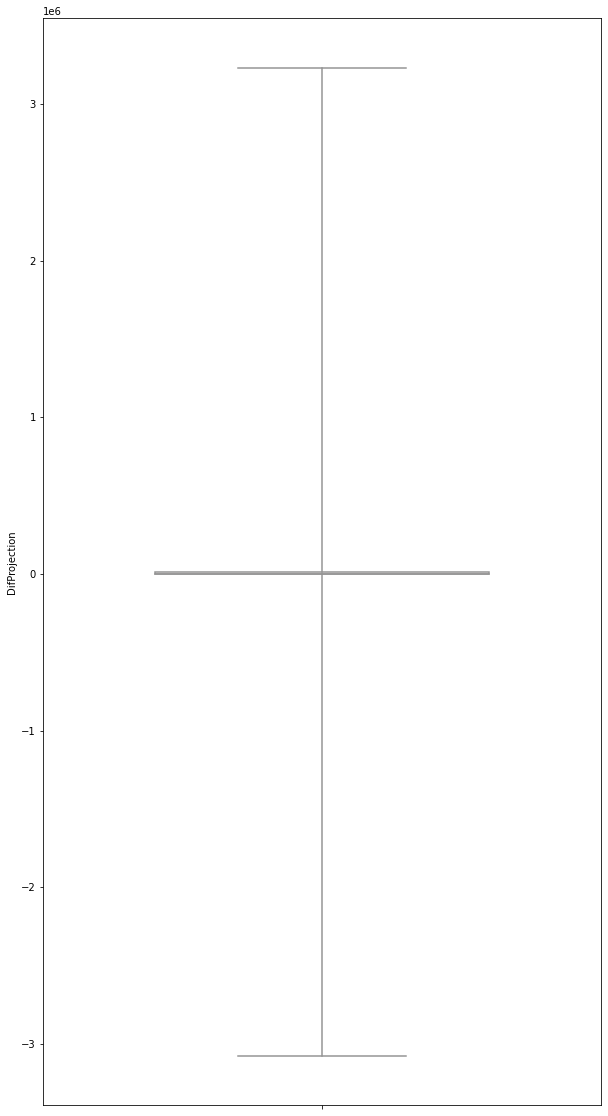

In [7]:
# Plot the orbital period with horizontal boxes
fig, ax = plt.subplots(1,1, figsize=(10,20))

sns.boxplot(y="DifProjection", data=df,
            whis=[0, 100], width=0.6, palette="vlag", ax=ax)

<AxesSubplot:xlabel='Result', ylabel='Moves'>

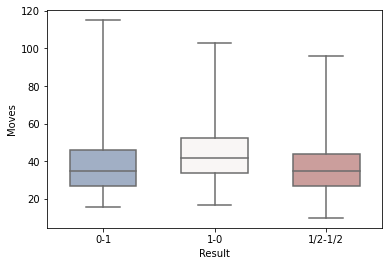

In [8]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Result", y="Moves", data=df,
            whis=[0, 100], width=.6, palette="vlag")

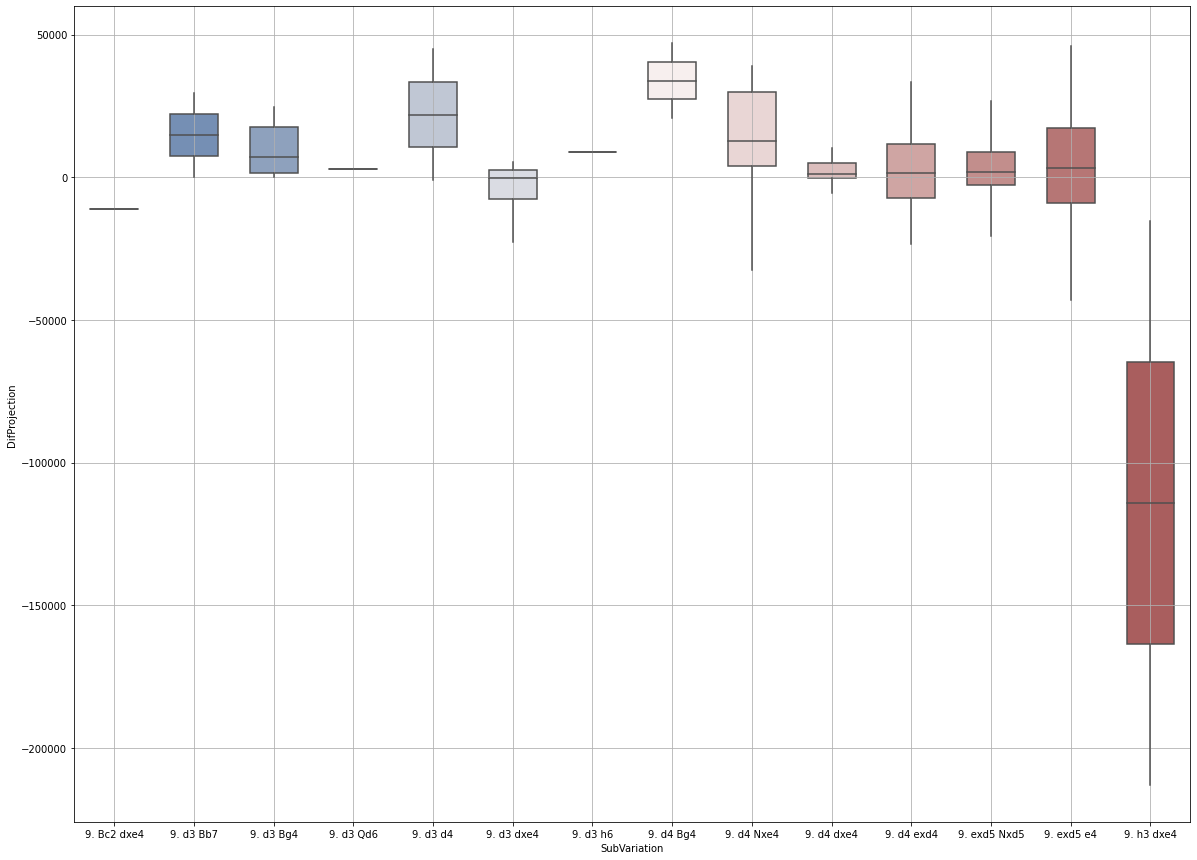

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="SubVariation", y="DifProjection", data=df,
            whis=1.5, width=.6, palette="vlag", ax=ax, showcaps=False, showfliers=False)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

In [10]:
df

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays,SubVariation,Mainline
563,366954,Chartres op,Chartres,1990,Gerald,"Pascot, J.",0-1,NaN,C89,NaN,0,1,41,2,3,5,1,"[29, 57, 54...",444,-1009,-1009,10,2,6,7,4,5,1,15,6,5,6,3,4,1,6012,-17288,-11276,1. e4 e5 2....,9. Bc2 dxe4,"['e4', 'e5'..."
1560,1024350,Yanofsky Mem,Winnipeg,2004,"Pierre,Rolland","Prince,Colin",1-0,NaN,C89,NaN,1,0,39,9,6,15,0,"[20, 50, 47...",2651,-230,2075,10,2,5,5,3,2,1,15,1,4,6,5,4,3,29804,-293,29511,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
348,224874,Ramsgate,Ramsgate/Ma...,1984,"O'Brien, Ri...","Crawley, Gavin",0-1,NaN,C89,NaN,0,1,47,4,5,9,0,"[26, 53, 47...",155,-698,-698,21,7,4,5,2,0,1,26,10,5,3,2,0,0,3270,-3185,85,1. e4 e5 2....,9. d3 Bb7,"['e4', 'e5'..."
192,125789,Lugano ol (...,Lugano,1968,"Yanofsky, D...","Rovira Mas,...",1-0,NaN,C89,NaN,1,0,41,6,4,10,1,"[37, 53, 54...",299,-109,275,10,14,4,6,0,0,0,21,7,3,6,2,1,0,4204,-850,3354,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
602,392471,Novi Sad ol...,Novi Sad,1990,"Cardose, S.","Gambiza, N.",1-0,NaN,C89,NaN,1,0,54,1,0,1,1,"[46, 55, 52...",1508,-447,1286,13,4,7,7,4,0,2,18,6,14,8,3,3,1,45458,-582,44876,1. e4 e5 2....,9. d3 Bg4,"['e4', 'e5'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,432619,Oberschwabe...,Jedesheim,1991,"Rector, D.","Rothmund, J.",0-1,NaN,C89,NaN,0,1,16,13,11,24,0,"[44, 42, 43...",177,-768,-762,7,2,2,0,1,2,0,11,2,0,1,1,0,0,1321,-3237,-1916,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
1707,1118881,IRT5,Sao Paulo,2006,"Jonas,Tiago...","Francelli,D...",1/2-1/2,NaN,C89,NaN,0,0,20,12,10,22,1,"[28, 40, 47...",156,-338,-29,6,5,2,2,0,1,0,7,5,3,2,2,0,0,1367,-3278,-1911,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
96,63572,Sao Paulo zt,Sao Paulo,1960,"Recalde, E.","Camara, Ronald",1/2-1/2,NaN,C89,NaN,0,0,20,11,10,21,0,"[32, 58, 42...",163,-142,143,8,3,3,2,1,0,0,9,4,3,0,3,0,0,2446,-142,2304,1. e4 e5 2....,9. exd5 e4,"['e4', 'e5'..."
1129,747453,CRO-chT2,Tucepi,1996,"Jelic, J.","Sertic, Rudolf",0-1,NaN,C89,NaN,0,1,22,11,12,23,0,"[27, 44, 54...",59,-99995,-99995,10,2,1,0,3,3,1,13,5,0,2,1,0,0,691,-213600,-212909,1. e4 e5 2....,9. h3 dxe4,"['e4', 'e5'..."


In [11]:
df_resultcount = df.groupby(['SubVariation','Date'])['Result'].size().reset_index(name='GamesCount')
df_resultcount.sort_values(by='Date')

,SubVariation,Date,GamesCount
84,9. exd5 Nxd5,1918,2
85,9. exd5 Nxd5,1921,2
86,9. exd5 Nxd5,1926,1
87,9. exd5 Nxd5,1927,1
88,9. exd5 Nxd5,1928,1
...,...,...,...
166,9. exd5 Nxd5,2019,29
167,9. exd5 Nxd5,2020,6
62,9. d4 dxe4,2020,1
168,9. exd5 Nxd5,2021,11


In [12]:
df_resultcount = df_resultcount.set_index(['SubVariation','Date'])
df_resultcount['GamesCountMA'] = df_resultcount['GamesCount'].rolling(7, center=True).mean()
df_resultcount = df_resultcount.reset_index()


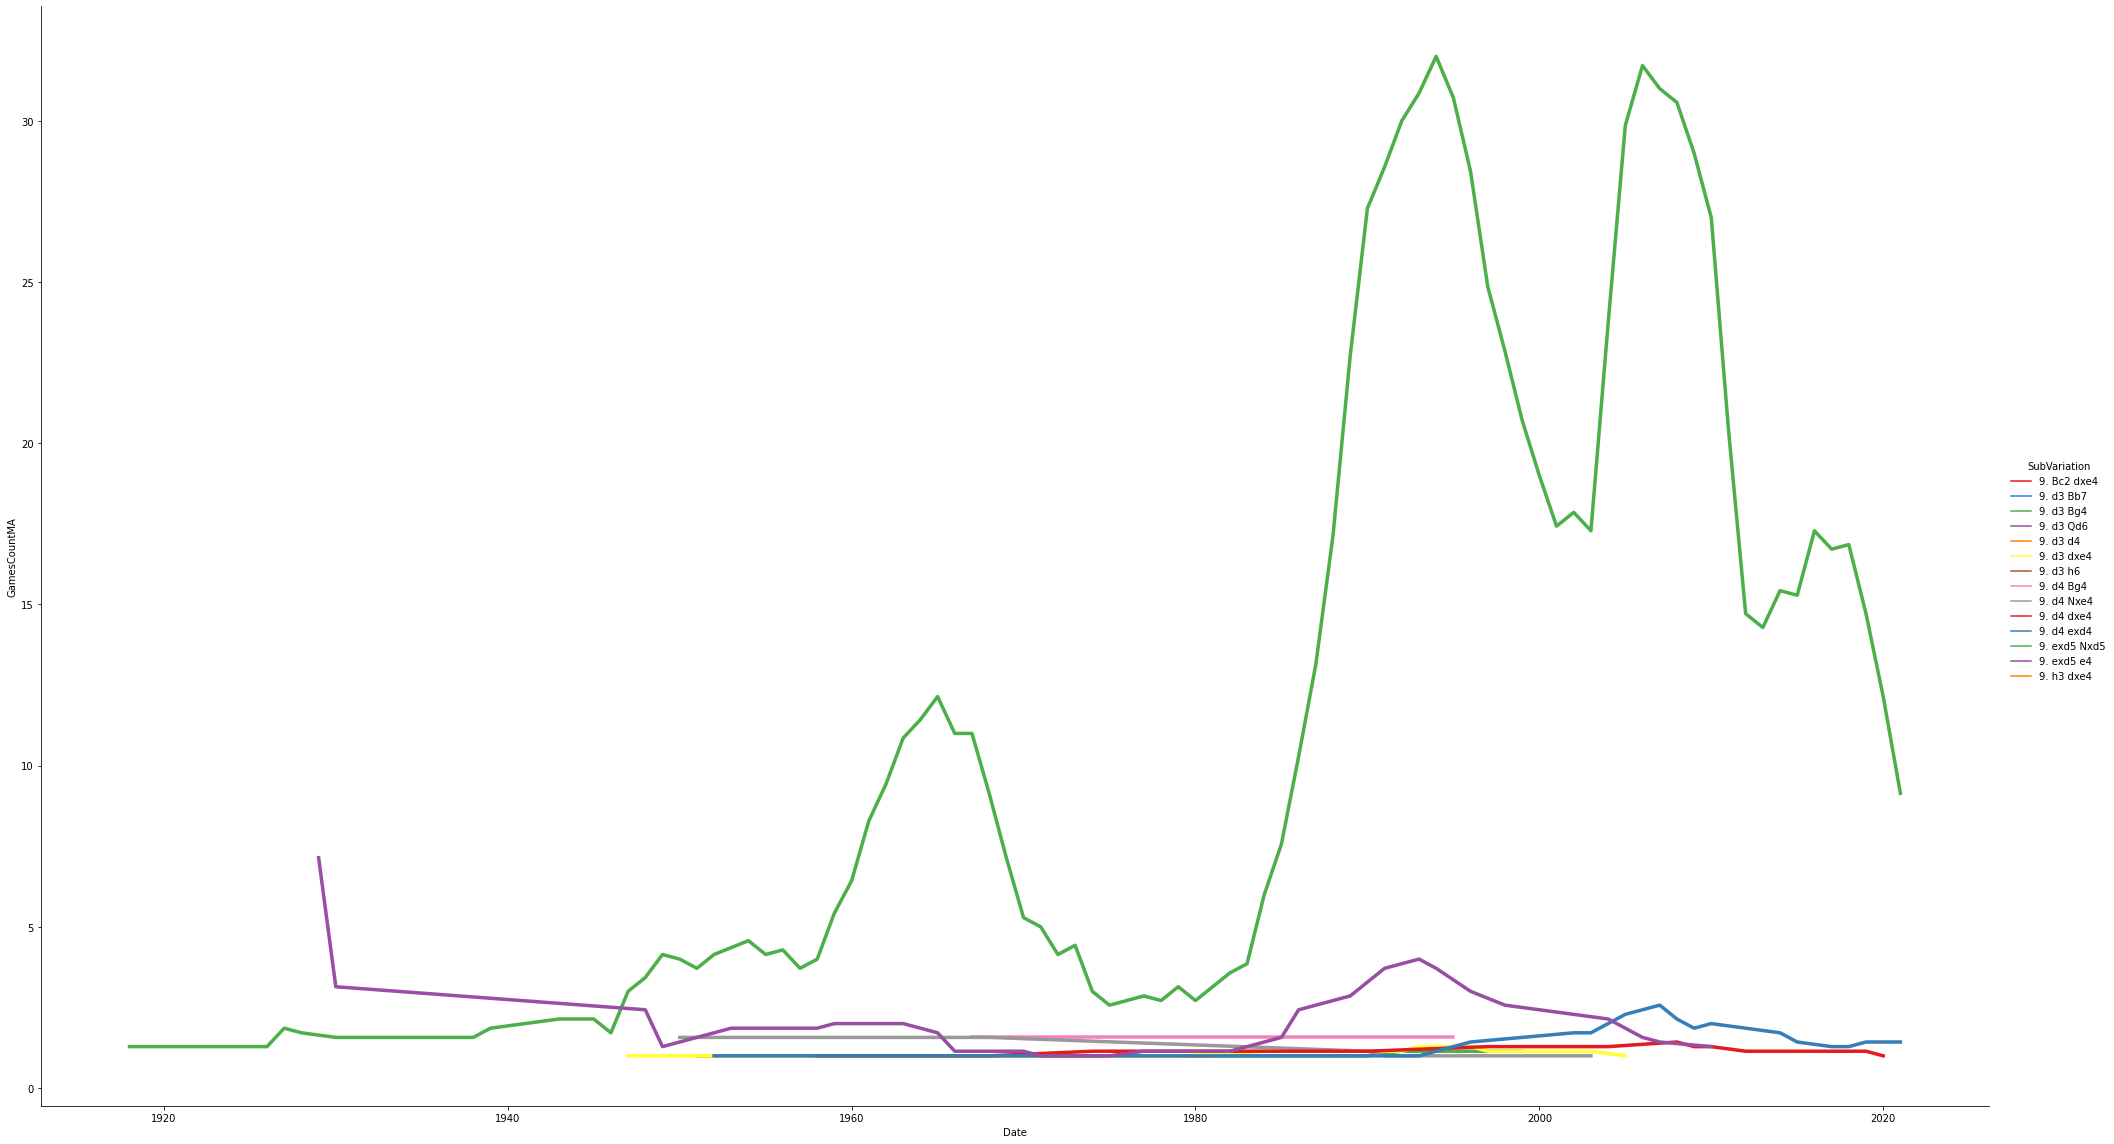

In [13]:
#fig, ax = plt.subplots(1,1, figsize=(20,15))
sns.relplot(
    data=df_resultcount,
    x="Date", y="GamesCountMA",
    hue="SubVariation",
    kind="line",
    height=16, aspect=1.75, palette='Set1', lw=3.5,
)

In [15]:
df_resultcount = df_resultcount.sort_values(by='SubVariation')
df_resultcount['total'] = df_resultcount['GamesCountMA']
df_resultcount['SubVariation'].unique().tolist()

['9. Bc2 dxe4',
 '9. d3 Bb7',
 '9. d3 Bg4',
 '9. d3 Qd6',
 '9. d3 d4',
 '9. d3 dxe4',
 '9. d3 h6',
 '9. d4 Bg4',
 '9. d4 Nxe4',
 '9. d4 dxe4',
 '9. d4 exd4',
 '9. exd5 Nxd5',
 '9. exd5 e4',
 '9. h3 dxe4']

In [16]:
df_resultcount = df_resultcount.sort_values(by='Date')
df_resultcount_var1 = df_resultcount.loc[df_resultcount['SubVariation'] == '9. Bc2 dxe4']
df_resultcount_var2 = df_resultcount.loc[df_resultcount['SubVariation'] == '9. d3 Bb7']
df_resultcount_var3 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 Bg4']
df_resultcount_var4 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 Qd6']
df_resultcount_var5 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 d4']
df_resultcount_var6 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 dxe4']
df_resultcount_var7 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d3 h6']
df_resultcount_var8 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 Bg4']
df_resultcount_var9 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 Nxe4']
df_resultcount_var10 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 dxe4']
df_resultcount_var11 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. d4 exd4']
df_resultcount_var12 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. exd5 Nxd5']
df_resultcount_var13 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. exd5 e4']
df_resultcount_var16 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. h3 dxe4']

#lowELO
#df_resultcount_var14 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. h3 Bb7']
#df_resultcount_var15 = df_resultcount.loc[df_resultcount['SubVariation'] ==  '9. h3 Na5']

In [17]:
def get_total_games(row):
   
    global count_anterior

    row['total'] = row['GamesCount'] + count_anterior
    count_anterior += row['GamesCount']
   
    return row

count_anterior = 0
df_resultcount_var1 = df_resultcount_var1.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var2 = df_resultcount_var2.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var3 = df_resultcount_var3.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var4 = df_resultcount_var4.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var5 = df_resultcount_var5.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var6 = df_resultcount_var6.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var7 = df_resultcount_var7.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var8 = df_resultcount_var8.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var9 = df_resultcount_var9.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var10 = df_resultcount_var10.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var11 = df_resultcount_var11.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var12 = df_resultcount_var12.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var13 = df_resultcount_var13.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
df_resultcount_var16 = df_resultcount_var16.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0


#LowELO
#df_resultcount_var14 = df_resultcount_var14.apply(lambda row: get_total_games(row), axis=1)
count_anterior = 0
#df_resultcount_var15 = df_resultcount_var15.apply(lambda row: get_total_games(row), axis=1)


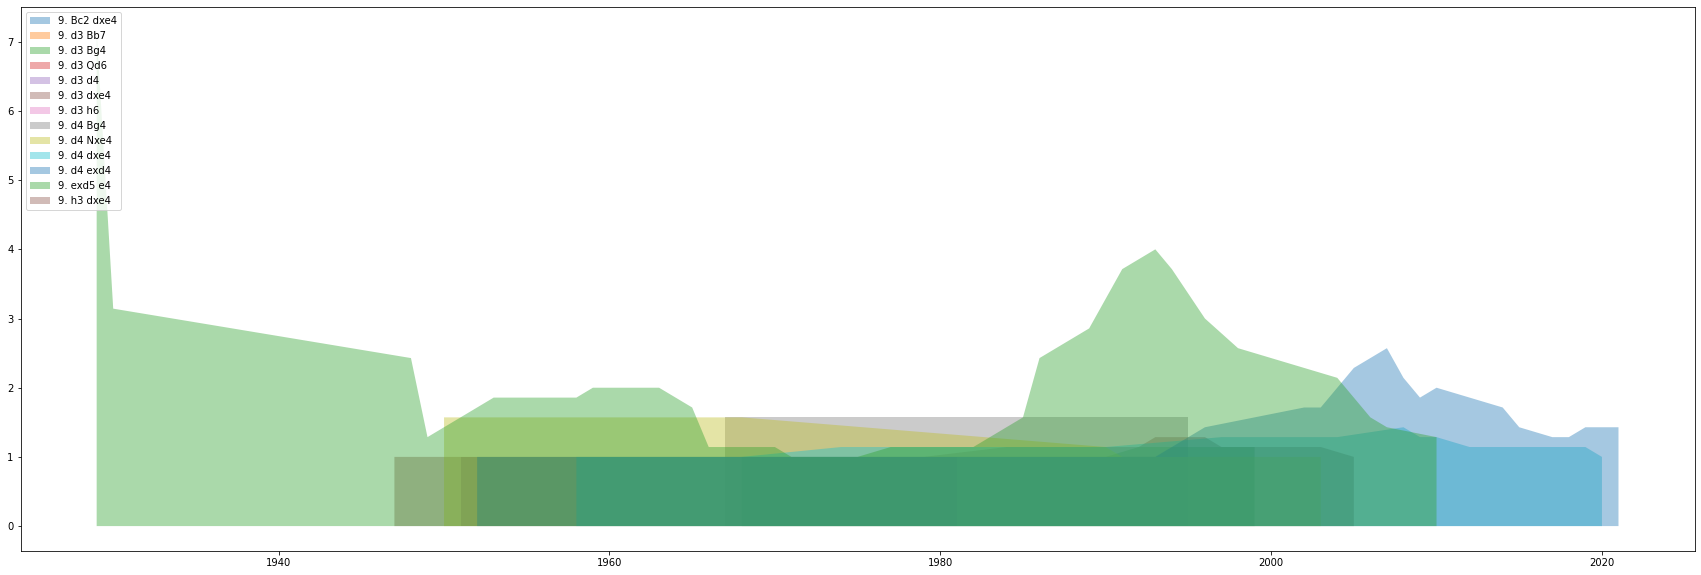

In [19]:
fig, ax = plt.subplots(1, figsize=(30,10))
ax.fill_between(df_resultcount_var1['Date'], df_resultcount_var1['GamesCountMA'], facecolor='C0', alpha=0.4, label='9. Bc2 dxe4')
ax.fill_between(df_resultcount_var2['Date'], df_resultcount_var2['GamesCountMA'], facecolor='C1', alpha=0.4, label='9. d3 Bb7')
ax.fill_between(df_resultcount_var3['Date'], df_resultcount_var3['GamesCountMA'], facecolor='C2', alpha=0.4, label='9. d3 Bg4')
ax.fill_between(df_resultcount_var4['Date'], df_resultcount_var4['GamesCountMA'], facecolor='C3', alpha=0.4, label='9. d3 Qd6')
ax.fill_between(df_resultcount_var5['Date'], df_resultcount_var5['GamesCountMA'], facecolor='C4', alpha=0.4, label='9. d3 d4')
ax.fill_between(df_resultcount_var6['Date'], df_resultcount_var6['GamesCountMA'], facecolor='C5', alpha=0.4, label='9. d3 dxe4')
ax.fill_between(df_resultcount_var7['Date'], df_resultcount_var7['GamesCountMA'], facecolor='C6', alpha=0.4, label='9. d3 h6')
ax.fill_between(df_resultcount_var8['Date'], df_resultcount_var8['GamesCountMA'], facecolor='C7', alpha=0.4, label='9. d4 Bg4')
ax.fill_between(df_resultcount_var9['Date'], df_resultcount_var9['GamesCountMA'], facecolor='C8', alpha=0.4, label='9. d4 Nxe4')
ax.fill_between(df_resultcount_var10['Date'], df_resultcount_var10['GamesCountMA'], facecolor='C9', alpha=0.4, label='9. d4 dxe4')
ax.fill_between(df_resultcount_var11['Date'], df_resultcount_var11['GamesCountMA'], facecolor='C10', alpha=0.4, label='9. d4 exd4')
#ax.fill_between(df_resultcount_var12['Date'], df_resultcount_var12['GamesCountMA'], facecolor='C11', alpha=0.4, label='9. exd5 Nxd5')
ax.fill_between(df_resultcount_var13['Date'], df_resultcount_var13['GamesCountMA'], facecolor='C12', alpha=0.4, label='9. exd5 e4')
ax.fill_between(df_resultcount_var16['Date'], df_resultcount_var16['GamesCountMA'], facecolor='C15', alpha=0.4, label='9. h3 dxe4')
ax.legend(loc='upper left')


#só tem em lowELO
#ax.fill_between(df_resultcount_var14['Date'], df_resultcount_var14['GamesCountMA'], facecolor='C13', alpha=0.4, label='9. h3 Bb7')
#ax.fill_between(df_resultcount_var15['Date'], df_resultcount_var15['GamesCountMA'], facecolor='C14', alpha=0.4, label='9. h3 Na5')

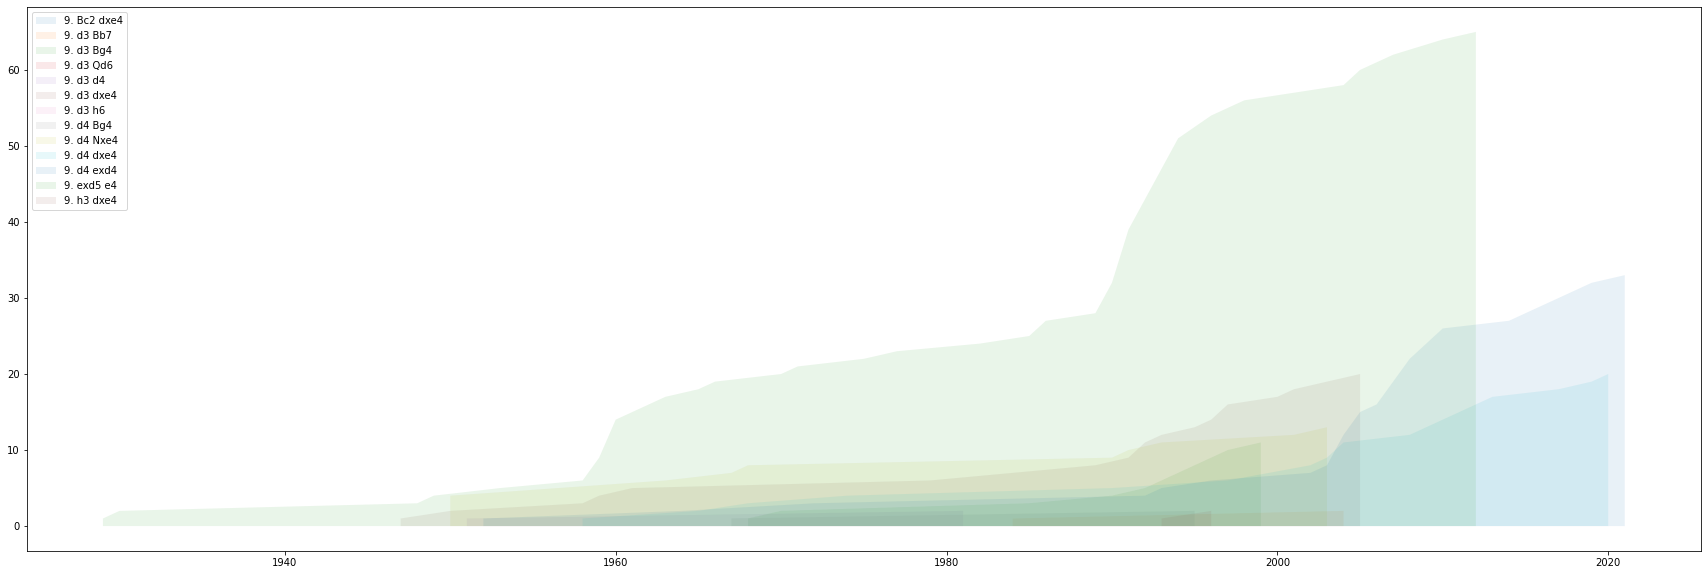

In [20]:
fig, ax = plt.subplots(1, figsize=(30,10))
ax.fill_between(df_resultcount_var1['Date'], df_resultcount_var1['total'], facecolor='C0', alpha=0.1, label='9. Bc2 dxe4')
ax.fill_between(df_resultcount_var2['Date'], df_resultcount_var2['total'], facecolor='C1', alpha=0.1, label='9. d3 Bb7')
ax.fill_between(df_resultcount_var3['Date'], df_resultcount_var3['total'], facecolor='C2', alpha=0.1, label='9. d3 Bg4')
ax.fill_between(df_resultcount_var4['Date'], df_resultcount_var4['total'], facecolor='C3', alpha=0.1, label='9. d3 Qd6')
ax.fill_between(df_resultcount_var5['Date'], df_resultcount_var5['total'], facecolor='C4', alpha=0.1, label='9. d3 d4')
ax.fill_between(df_resultcount_var6['Date'], df_resultcount_var6['total'], facecolor='C5', alpha=0.1, label='9. d3 dxe4')
ax.fill_between(df_resultcount_var7['Date'], df_resultcount_var7['total'], facecolor='C6', alpha=0.1, label='9. d3 h6')
ax.fill_between(df_resultcount_var8['Date'], df_resultcount_var8['total'], facecolor='C7', alpha=0.1, label='9. d4 Bg4')
ax.fill_between(df_resultcount_var9['Date'], df_resultcount_var9['total'], facecolor='C8', alpha=0.1, label='9. d4 Nxe4')
ax.fill_between(df_resultcount_var10['Date'], df_resultcount_var10['total'], facecolor='C9', alpha=0.1, label='9. d4 dxe4')
ax.fill_between(df_resultcount_var11['Date'], df_resultcount_var11['total'], facecolor='C10', alpha=0.1, label='9. d4 exd4')
#ax.fill_between(df_resultcount_var12['Date'], df_resultcount_var12['total'], facecolor='C11', alpha=0.1, label='9. exd5 Nxd5')
ax.fill_between(df_resultcount_var13['Date'], df_resultcount_var13['total'], facecolor='C12', alpha=0.1, label='9. exd5 e4')
ax.fill_between(df_resultcount_var16['Date'], df_resultcount_var16['total'], facecolor='C15', alpha=0.1, label='9. h3 dxe4')
ax.legend(loc='upper left')

#só tem em lowELO
#ax.fill_between(df_resultcount_var14['Date'], df_resultcount_var14['total'], facecolor='C13', alpha=0.1, label='9. h3 Bb7')
#ax.fill_between(df_resultcount_var15['Date'], df_resultcount_var15['total'], facecolor='C14', alpha=0.1, label='9. h3 Na5')

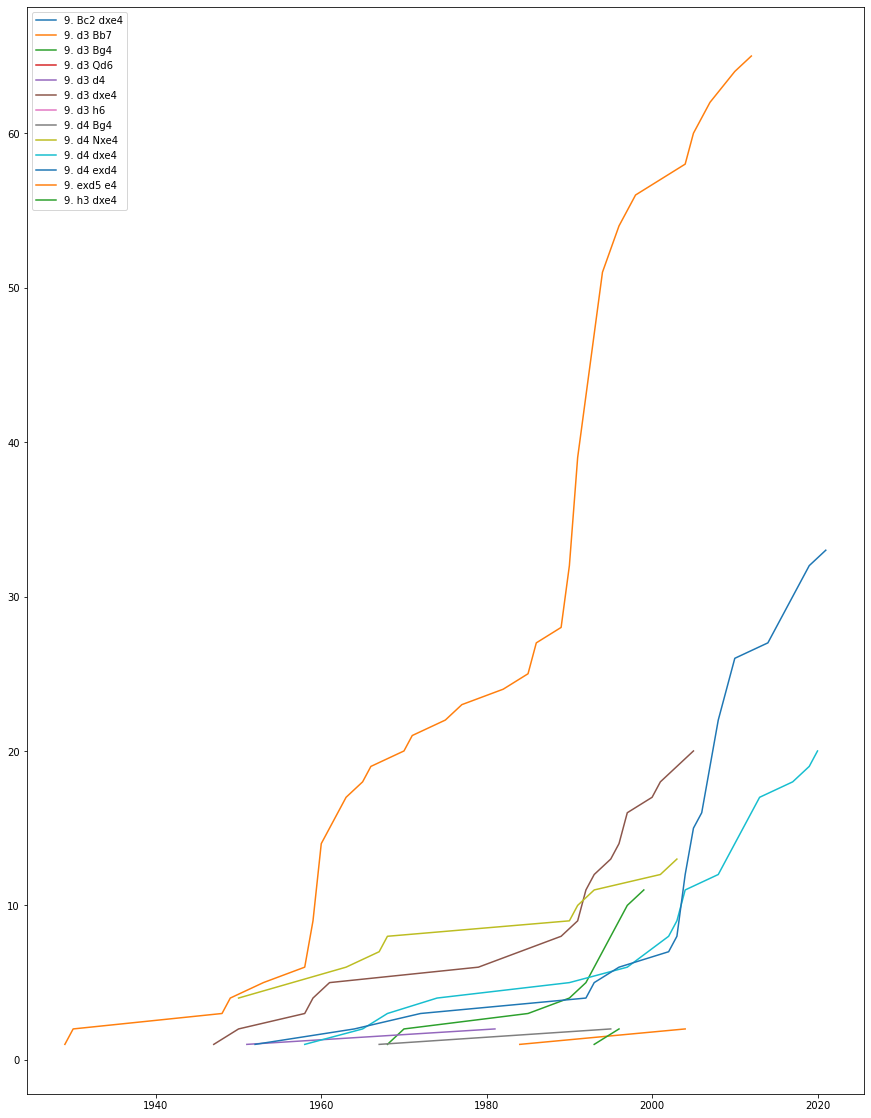

In [21]:
fig, ax = plt.subplots(1, figsize=(15,20))
ax.plot(df_resultcount_var1['Date'], df_resultcount_var1['total'], alpha=1, label='9. Bc2 dxe4')
ax.plot(df_resultcount_var2['Date'], df_resultcount_var2['total'], alpha=1, label='9. d3 Bb7')
ax.plot(df_resultcount_var3['Date'], df_resultcount_var3['total'], alpha=1, label='9. d3 Bg4')
ax.plot(df_resultcount_var4['Date'], df_resultcount_var4['total'], alpha=1, label='9. d3 Qd6')
ax.plot(df_resultcount_var5['Date'], df_resultcount_var5['total'], alpha=1, label='9. d3 d4')
ax.plot(df_resultcount_var6['Date'], df_resultcount_var6['total'], alpha=1, label='9. d3 dxe4')
ax.plot(df_resultcount_var7['Date'], df_resultcount_var7['total'], alpha=1, label='9. d3 h6')
ax.plot(df_resultcount_var8['Date'], df_resultcount_var8['total'], alpha=1, label='9. d4 Bg4')
ax.plot(df_resultcount_var9['Date'], df_resultcount_var9['total'], alpha=1, label='9. d4 Nxe4')
ax.plot(df_resultcount_var10['Date'], df_resultcount_var10['total'], alpha=1, label='9. d4 dxe4')
ax.plot(df_resultcount_var11['Date'], df_resultcount_var11['total'], alpha=1, label='9. d4 exd4')
#ax.plot(df_resultcount_var12['Date'], df_resultcount_var12['total'], alpha=1, label='9. exd5 Nxd5')
ax.plot(df_resultcount_var13['Date'], df_resultcount_var13['total'], alpha=1, label='9. exd5 e4')
ax.plot(df_resultcount_var16['Date'], df_resultcount_var16['total'], alpha=1, label='9. h3 dxe4')
ax.legend(loc='upper left')


#só tem em lowELO
#ax.plot(df_resultcount_var14['Date'], df_resultcount_var14['total'], alpha=1, label='9. h3 Bb7')
#ax.plot(df_resultcount_var15['Date'], df_resultcount_var15['total'], alpha=1, label='9. h3 Na5')

In [22]:
list_df_variations = [df_resultcount_var1,df_resultcount_var2,df_resultcount_var3,df_resultcount_var4,df_resultcount_var5,df_resultcount_var6,df_resultcount_var7,df_resultcount_var8,df_resultcount_var9,df_resultcount_var10,df_resultcount_var11,df_resultcount_var12,df_resultcount_var13,df_resultcount_var16]
#df_resultcount_var14, ,df_resultcount_var15 só tem em jogo lowELO
contador = 0
variations_info = []
for variation in list_df_variations:
    contador += 1
    info = {}
    info['id'] = contador
    info['Variation'] = variation['SubVariation'].iloc[0] # variation

    gamescount = variation['GamesCount'].tolist() #lista da qntd de jogos por ano
    max_year_qntd = max(gamescount) #qntd de jogos no ano q mais teve
    max_year_qntd_index = gamescount.index(max_year_qntd) #indice da var com qntd de jogos no ano q mais teve
    info['PicoQntdJogos'] = max_year_qntd #o pico de jogos jogados da variation

    pico_ano = variation.loc[variation['GamesCount'] == max_year_qntd]['Date'].iloc[0] # descobre qual o ano que ocorreu o pico
    info['PicoAno'] = pico_ano

    info['Total'] = variation['total'].iloc[-1] #total de jogos da variation

    print(info)

    variations_info.append(info)


{'id': 1, 'Variation': '9. Bc2 dxe4', 'PicoQntdJogos': 1, 'PicoAno': 1990, 'Total': 1}
{'id': 2, 'Variation': '9. d3 Bb7', 'PicoQntdJogos': 1, 'PicoAno': 1984, 'Total': 2}
{'id': 3, 'Variation': '9. d3 Bg4', 'PicoQntdJogos': 2, 'PicoAno': 1996, 'Total': 11}
{'id': 4, 'Variation': '9. d3 Qd6', 'PicoQntdJogos': 1, 'PicoAno': 1945, 'Total': 1}
{'id': 5, 'Variation': '9. d3 d4', 'PicoQntdJogos': 1, 'PicoAno': 1951, 'Total': 2}
{'id': 6, 'Variation': '9. d3 dxe4', 'PicoQntdJogos': 2, 'PicoAno': 1992, 'Total': 20}
{'id': 7, 'Variation': '9. d3 h6', 'PicoQntdJogos': 1, 'PicoAno': 1990, 'Total': 1}
{'id': 8, 'Variation': '9. d4 Bg4', 'PicoQntdJogos': 1, 'PicoAno': 1967, 'Total': 2}
{'id': 9, 'Variation': '9. d4 Nxe4', 'PicoQntdJogos': 4, 'PicoAno': 1950, 'Total': 13}
{'id': 10, 'Variation': '9. d4 dxe4', 'PicoQntdJogos': 2, 'PicoAno': 2002, 'Total': 20}
{'id': 11, 'Variation': '9. d4 exd4', 'PicoQntdJogos': 4, 'PicoAno': 2004, 'Total': 33}
{'id': 12, 'Variation': '9. exd5 Nxd5', 'PicoQntdJogos